## **Modelagem e Avaliação do modelo**

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn import metrics
from yellowbrick.classifier import ROCAUC
import scikitplot as skplt

import matplotlib.pyplot as plt
import seaborn as sns

/home/luis/.local/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
X = pd.read_csv('X.csv')

In [3]:
y = pd.read_csv('y.csv')

In [4]:
df = pd.read_csv('X_dados_balanceados.csv')

### **Divisão do Conjunto de Dados em Treino, Teste e Validação**

Para dividir os dados em treino e teste, utilizamos a função train_test_split do sklearn e passamos o parâmetro text_size para utilizar uma divisão, normalmente em projetos menores e épocas anteriores sempre foi feita uma divisão de 70% para treino e 30% para teste. 

Porém a proporção de divisão normalmente vai depender do tamanho do conjunto de dados, em projetos de machine learning menores e mais antigos é comum ser utilizada essa divisão, porém, em projetos com conjunto de dados maiores e atuais, a proporção da divisão dos conjuntos de dados acaba sendo diferente e acaba tendo uma terceira categoria, como desenvolvimento ou validação, e o conjunto de dados irá ser dividido em conjunto de treino, desenvolvimento ou validação e teste, com um número muito maior de dados para o conjunto de treino e um número bem pequeno para o conjunto de desenvolvimento ou validação e teste.

Para esse caso a ideia é produzir uma divisão de 60%, 20%, 20% para respectivamente conjuntos de treinamento, validação e teste.

A primeira divisão cria 80% de treinamento + 20% de teste.

In [5]:
#Dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

 A segunda divisão começa com a divisão de 80% treinamento + validação e atribui 25% desses 80% à divisão de validação. Esse tamanho vem de 0,25 X 0,80 = 0,20 (20%). 
 
Portanto, a divisão de validação é de 20%. Então, agora temos validação e teste em 20% cada. O tamanho da divisão do treinamento é calculado como 75% de 80% = 0,75 X 0,80 = 0,60 (60%). 

Portanto, isso dá um tamanho de divisão de treinamento de 60%. No geral, isso dá 60% -20% -20% para o teste de validação do trem.

In [6]:
#Dados de Validação
X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### **Random Forest Classifier**

Um dos principais motivos para o uso do Random Forest é que esse algoritmo tem a capacidade de manter a precisão quando uma grande proporção de dados está faltando, que foi um dos problemas enfrentados com o conjunto de dados do problema.

Como a floresta aleatória combina várias árvores para prever a classe do conjunto de dados, é possível que algumas árvores de decisão possam prever a saída correta, enquanto outras não. Mas juntas, todas as árvores preveem a saída correta. 

**Como funciona?**

De forma não técnica para se compreender melhor, existe o exemplo clássico do conjunto de dados da cesta de frutas. Suponha que haja um conjunto de dados que contém várias imagens de frutas. 

* Esse conjunto de dados é fornecido ao classificador de floresta aleatória. 
* O conjunto de dados vai ser dividido em subconjuntos e dado a cada árvore de decisão. 
* Durante a fase de treinamento, cada árvore de decisão produz um resultado de previsão e, quando um novo ponto de dados ocorre.
* Com base na maioria dos resultados, o classificador Random Forest prevê a decisão final de qual é a fruta que a imagem se refere.

Além disso, o Random Forest também é bastante usado para problemas na área de marketing, que envolve a problemática que o modelo está sendo desenvolvido:

* **Marketing: As tendências de marketing podem ser identificadas usando o Random Forest.**
* Bancário: O setor bancário usa principalmente este algoritmo para a identificação do risco de empréstimo.
* Medicina: Com a ajuda deste algoritmo, as tendências da doença e os riscos da doença podem ser identificados.



In [7]:
#Construindo o modelo
model = RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_features='sqrt', min_samples_leaf=1,
                       random_state=42, n_jobs=-1, n_estimators = 1000)

* O parâmetro criterion usa uma função para medir a qualidade de uma divisão. E o critério “entropia” busca realizar o ganho de informação.
* com o min_samples_leaf o objetivo é ter o efeito de suavizar o modelo, com o número mínimo de amostras necessárias para estar em um nó.
* O modo “balanced” usa os valores de y para ajustar automaticamente pesos inversamente proporcionais às frequências de classe nos dados de entrada.
* bootstrap False todo o conjunto de dados é usado para construir cada árvore.
* Se “sqrt”, o número de recursos utilizados será de forma automática.
* n_jobs -1 significa usar todos os processadores.
* o random_state está relacionado a aleatoriedade do bootstrap das amostras usadas na construção de árvores.

**Treinamento**

In [8]:
model.fit(X_train, y_train)

/tmp/ipykernel_8548/180087699.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_features='sqrt',
                       n_estimators=1000, n_jobs=-1, random_state=42)

**Teste, Validação e Avaliação do modelo**

In [9]:
#Treino
y_train_pred = model.predict(X_train)  #calcula a predição
y_train_prob = model.predict_proba(X_train) #calcula a probabilidade
auc_train = metrics.roc_auc_score(y_train, y_train_prob[:,1])

#Teste
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)
auc_test = metrics.roc_auc_score(y_test, y_test_prob[:,1])

#Validação
y_val_pred = model.predict(X_val)
y_val_prob = model.predict_proba(X_val)
auc_val = metrics.roc_auc_score(y_val, y_val_prob[:,1])

                                  
print("\nAcurácia Treino: ", metrics.accuracy_score(y_train, y_train_pred))
print("AUC Treino: ", auc_train)

print("\nAcurácia Teste: ", metrics.accuracy_score(y_test, y_test_pred))
print("AUC Teste: ", auc_test)

print("\nAcurácia Validação: ", metrics.accuracy_score(y_val, y_val_pred))
print("AUC Validação: ", auc_val)


Acurácia Treino:  0.9999486969012928
AUC Treino:  0.9999999947359811

Acurácia Teste:  0.944391244870041
AUC Teste:  0.9900233769177471

Acurácia Validação:  0.9999315958683904
AUC Validação:  0.9999999906417264


Note que além de realizar as previsões do modelo, também realizei a probabilidades da previsão do modelo, ou seja, a probabilidade para quando a campanha não é aderida e para quando a campanha é aderida. Isso acaba sendo muito útil para avaliar o modelo através da curva de ROC.

In [10]:
#Probabilidade da não aderência da campanha e da aderência da campanha
y_test_prob

array([[0.037, 0.963],
       [1.   , 0.   ],
       [0.088, 0.912],
       ...,
       [0.998, 0.002],
       [0.   , 1.   ],
       [0.998, 0.002]])

### **Avaliação do Modelo e Métricas de avaliação de um Classificador**

---------------------------------------------------


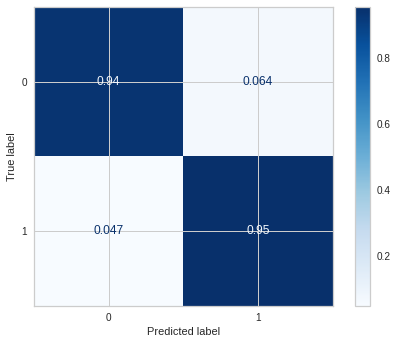

In [11]:
from sklearn.metrics import plot_confusion_matrix

print('---------------------------------------------------')
plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap='Blues')
plt.show()

Se observarmos, a matriz de confusão possui duas linhas e duas colunas. E os seus quatros valores se relacionam na diagonal, **False Positive (FP) e False Negative (FN)**  para os valores que foram classificados errados e representam os dois tipos de erros que o modelo pode cometer, similar aos testes de hipóteses da estatística, que nessa matriz de confusão são os azuis mais claros:

* O primeiro tipo de erro é o **falso positivo (FP)**: Quer dizer que o dado pertence à classe positiva, quando na verdade pertence à classe negativa. Isso seria um Erro Tipo I. Para esse erro o modelo apresentou um _resultado de 0.067_


* O segundo tipo de erro é o **falso negativo (FN)**: Quer dizer que o dado pertence à classe negativa, quando na verdade pertence à classe positiva. Isso seria um Erro Tipo II. Para esse erro o modelo apresentou um _resultado de 0.039_

Por outro lado, em uma outra diagonal se relacionam, **True Negative (TN) e True Positive (TP)** para os valores que foram classificados corretamente e representam os dois acertos do modelo, veja:

* O primeiro acerto é o **verdadeiro negativo (TN)** Quer dizer que valores classificados como negativos nos dados originais e corretamente previstos como negativos no modelo.  Para esse acerto o modelo apresentou um _resultado de 0.93_


* O segundo acerto é o **verdadeiro positivo (TP)**: Quer dizer que valores classificados como positivos nos dados originais e corretamente previstos como positivos no modelo. Para esse acerto o modelo apresentou um _resultado de 0.96_

Após esse entendimento, fica claro que desejamos minimizar **FP e FN** e maximizar **TP e TN**. Porém, em muitos casos, isso não será totalmente possível, e dependendo da aplicação, devemos priorizar a minimização dos FP ou dos FN.


A partir dos resultados da matriz de confusão, é possível calcular outras três métricas, como Acurácia, Precisão e Recall do modelo, que também servem para medir o desempenho da classificação.

E a métrica F1-Score ou F-measure como também é conhecida, conseguimos obter seu resultado a partir da média harmônica entre a precisão e a revocação, as duas métricas vistas anteriormente. 

In [12]:
print("\nAcurácia Treino: {}%".format(round(model.score(X_train, y_train)*100, 2)))
print(classification_report(y_train, y_train_pred))


print("\nAcurácia Teste: {}%".format(round(model.score(X_test, y_test)*100, 2)))
print(classification_report(y_test, y_test_pred))


print("\nAcurácia Validação: {}%".format(round(model.score(X_val, y_val)*100, 2)))
print(classification_report(y_val, y_val_pred))


Acurácia Treino: 99.99%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29216
           1       1.00      1.00      1.00     29260

    accuracy                           1.00     58476
   macro avg       1.00      1.00      1.00     58476
weighted avg       1.00      1.00      1.00     58476


Acurácia Teste: 94.44%
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7332
           1       0.94      0.95      0.94      7288

    accuracy                           0.94     14620
   macro avg       0.94      0.94      0.94     14620
weighted avg       0.94      0.94      0.94     14620


Acurácia Validação: 99.99%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7298
           1       1.00      1.00      1.00      7321

    accuracy                           1.00     14619
   macro avg       1.00      1.00      1.00     146

**Notas**

* A métrica **acurácia** é a mais simples para se utilizar, e tem como objetivo representar o resultado de quantos de nossos exemplos foram de fato classificados corretamente. **Então o modelo conseguiu classificar corretamente 94% a partir dos dados de teste.**


* A métrica **precisão**, busca representar o resultado de quantos exemplos realmente são positivos dos que foram classificados como positivos pelo modelo. Ou seja, para a classe 0 Não aderência (quantos estão corretamente classificados entre essa classe) **o modelo apresentou um resultado de 96% a partir dos dados de teste** e para a classe 1 aderência da campanha, **o modelo apresentou um resultado de 94% a partir dos dados de teste**.

_Vale lembrar que existe um problema em a precisão e o recall serem usados para avaliar modelo a partir de conjuntos de dados desbalanceados, porque em um conjunto de dados altamente desbalanceado, uma precisão de 99% pode não ter sentido. O que não é o caso visto que foi utilizada uma técnica para balancear os dados._


* A métrica **reccal**, apesar da interpretação dos seus resultados ser muito semelhante à métrica de precisão, diferentemente da precisão que está interessada em dar ênfase maior para os erros por falso positivo, na revocação o interesse maior está em dar ênfase para os erros por falso negativo. Ou seja, para a classe 0 Não aderência (Dos dados que são positivos, quantos foram classificados corretamente na previsão? Dessa classe) **o modelo apresentou um resultado de 93% a partir dos dados de teste** e para a classe 1 Aderência da campanha, **o modelo apresentou um resultado de 96% a partir dos dados de teste**.


*  A métrica **F1-Score ou F-measure** como também é conhecida, trata-se de uma média harmônica entre a precisão e a revocação, então para que o  f1-score tenha um resultado alto e positivo, é preciso que a precisão e a revocação também tenham resultados altos. Vale lembrar que essa métrica acaba sendo muit  boa quando temos um conjunto de dados com classes desproporcionais, e o modelo não emite probabilidades. Para essa métrica o **o modelo apresentou um resultado de 0.95% a partir dos dados de teste** tanto para a classe 0 quanto para a classe 1.

E o support que aparece no final é o número de ocorrências de determinada classe no conjunto de dados.




A curva ROC (Receiver Operating Curve) é uma outra forma de avaliar o desempenho de classificadores.

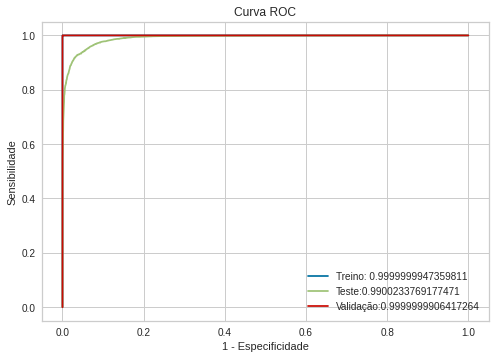

In [13]:
#Gráfico da curva ROC

roc_train = metrics.roc_curve(y_train, y_train_prob[:,1])
roc_test = metrics.roc_curve(y_test, y_test_prob[:,1])
roc_val = metrics.roc_curve(y_val, y_val_prob[:,1])

plt.plot(roc_train[0], roc_train[1])
plt.plot(roc_test[0], roc_test[1])
plt.plot(roc_val[0], roc_val[1])


plt.xlabel("1 - Especificidade")
plt.ylabel("Sensibilidade")
plt.title("Curva ROC")
plt.legend([f"Treino: {auc_train}", f"Teste:{auc_test}", f"Validação:{auc_val}"])

plt.show()

Basicamente, o ROC é um gráfico do trade-off existente entre erros (FPR - Especificidade) e acertos (TPR - Taxa verdadeiro positivo ou sensibilidade) para diferentes fronteiras de decisão de um classificador. 


Então, existe uma divisão a partir da fronteira de decisão entre falsos positivos e verdadeiros positivos. E a fronteira de decisão (linha que separa) pode ser, por exemplo, o threshold de probabilidade que separa a classe negativa da classe positiva. 

De modo geral, **quanto mais próxima a curva estiver do canto superior esquerdo, onde tem 1.0 (entendido como perfect Classification), melhor é a predição do modelo**, tendo em vista que ele teria 100% de TPR(Taxa verdadeiro positivo) e 0% de FPR (taxa falso positivo). 

Curvas para baixo significam que o classificador se comporta pior do que chutes aleatórios sobre as classes.




Uma forma de sumarizar o desempenho do classificador usando o ROC é através da área embaixo da curva ROC: **AUC (Area Under Curve).**

/home/luis/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


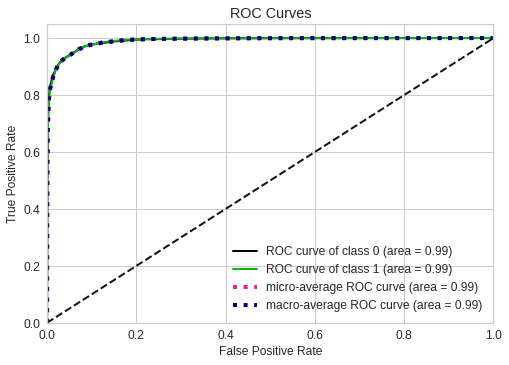

In [14]:
skplt.metrics.plot_roc_curve(y_test, y_test_prob)
plt.show()


A AUC do ROC é uma métrica que vai de 0 a 1. Quanto mais próximo de 1, melhor é o desempenho geral do classificador.

Comparar classificadores com AUC é uma tarefa trivial: o classificador com maior AUC possui o melhor desempenho geral. A AUC (Area) de um classificador aleatório é 0.5, logo qualquer classificador com AUC superior a 0.5 é um classificador melhor do que chutes aleatórios.

Observando o gráfico da curva ROC do modelo, fica claro que o classificador possui uma curva ROC acima da reta y=x. Logo, possivelmente o modelo se comporta melhor que o classificador aleatório.

Além disso, a **AUC (Area) possui o valor de 0.99 para a classe 0 (Não aderência da campanha) e para a classe 1 (Aderência da campanha)**, ou seja, o classificador possui um bom desempenho geral, por o valor está muito próximo de 1. Qualquer classificador com AUC superior a 0.5 é um classificador melhor do que chutes aleatórios.

### **Comparação de modelos com AutoML (Pycaret)**

In [16]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
#importando a biblioteca do Pycaret
from pycaret.classification import *

In [19]:
#Inicializando o pré-processamento do Pycaret
models = setup(data=df,
             target='aderencia_campanha',
             
             session_id=33)

,Description,Value
0,session_id,33
1,Target,aderencia_campanha
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(73096, 37)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,28
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
#Comparação dos modelos e seus desempenhos
compare_models ()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9494,0.9922,0.9490,0.9501,0.9495,0.8987,0.8987,55.4590
lightgbm,Light Gradient Boosting Machine,0.9493,0.9924,0.9497,0.9494,0.9495,0.8986,0.8987,0.1940
rf,Random Forest Classifier,0.9492,0.9920,0.9536,0.9458,0.9497,0.8985,0.8985,1.0010
et,Extra Trees Classifier,0.9421,0.9886,0.9334,0.9505,0.9418,0.8842,0.8844,1.4510
ada,Ada Boost Classifier,0.9342,0.9856,0.9276,0.9406,0.9341,0.8685,0.8686,0.4890
gbc,Gradient Boosting Classifier,0.9332,0.9869,0.9545,0.9161,0.9349,0.8665,0.8673,1.7870
dt,Decision Tree Classifier,0.9328,0.9327,0.9393,0.9277,0.9335,0.8655,0.8656,0.1020
ridge,Ridge Classifier,0.9275,0.0000,0.8867,0.9660,0.9247,0.8550,0.8579,0.0420
lda,Linear Discriminant Analysis,0.9275,0.9846,0.8868,0.9660,0.9247,0.8550,0.8579,0.3900
knn,K Neighbors Classifier,0.9032,0.9550,0.9739,0.8538,0.9099,0.8062,0.8144,0.8630


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=33, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

Através do compare models é possível identificar qual modelo obtive os melhores resultados para cada métrica. E essa capacidade que o Pycaret tem acaba sendo muito importante, para conseguir fazer uma comparação de diferentes modelos e poupar tempo. 

E apesar de ter escolhido o Random Forest Classifier, segundo o Pycaret esse acaba não sendo o melhor modelo para o problema, ficando o Random Forest na terceira posição. Dessa forma, agora eu poderia construir de forma manual e obter um melhor entendimento do Extreme gradient boosting.

O motivo para o bom desempenho do XGBoost pode está relacionado ao algoritmo possuir um poder preditivo imensamente alto que o torna a melhor escolha para precisão em eventos, pois possui tanto o modelo linear quanto o algoritmo de aprendizado de árvores, tornando o algoritmo quase 10x mais rápido do que as técnicas existentes de ‘boosting’ de gradiente.

O algoritmo é uma otima opção para quando as coisas não saem como queriamos na modelagem preditiva. Devido que é um algoritmo altamente sofisticado e poderoso o suficiente para lidar com todos os tipos de irregularidades de dados. O que acaba sendo um fator enfrentado no conjunto de dados do problema.

Vale ressaltar que o algoritmo XGBoost foi desenvolvido como um projeto de pesquisa na Universidade de Washington e desde a sua introdução, este algoritmo tem sido o mais vitorioso no Kaggle, além de está sendo utilizado em várias aplicações de ponta na indústria.

### **Conclusão**

Para decidir qual o modelo utilizar as métricas acabam sendo muito valiosas para avaliar a qualidade de um modelo machine learning, neste caso especificamente de classificação, avaliar quanto o modelo consegue classificar bem, portanto é preciso que se busque realizar essa avaliação através de não apenas uma única métrica, mas sim também de outras e que seja possível de interpretar os seus resultados, para que as conclusões sobre o desempenho e qualidade do modelo sejam corretas.  Ademais, é sempre importante ter uma visão crítica e um bom entendimento sobre os resultados.

Fazendo isso de forma manual e mais rápida com o objetivo de comparar os resultados, como o caso do Pycaret.


Apesar do XGBOOST ser um algoritmo que vem se destacando, como cientista de dados, o profissional deve testar todos os algoritmos possíveis para os dados disponíveis e escolher o que melhor se aplica ao problema proposto.

Vale lembrar que escolher o algoritmo certo não é suficiente. É preciso escolher a configuração correta do algoritmo para um determinado conjunto de dados, ajustando os hiper-parâmetros